# Walkthrough 2D

In [1]:
from gait3d.gaitanalysis_top import RecordingTop
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
files = [file for file in Path("/Users/kobel/Downloads/DLC_data/").iterdir() if file.name.endswith('filtered.csv')]
files

[PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220811_OTEDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/209_F1-91_220811_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/195_F8-16_220809_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220810_OTTDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/195_F8-20_220811_OTR001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-81_220809_OTRDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220809_OTRDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/209_F1-92_220811_OTR001DLC_resnet152_OT_TopC



Report for 206_F2-87_220811_OTE: 

Missing events: ['freezing', 'freezing_of_gait']


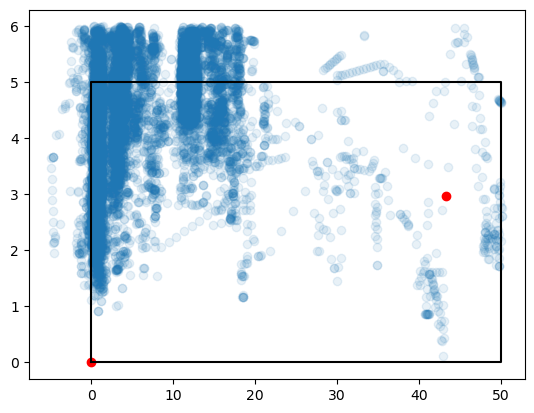



Report for 209_F1-91_220811_OTT: 

TailBase tracking: 0.8834185374527673


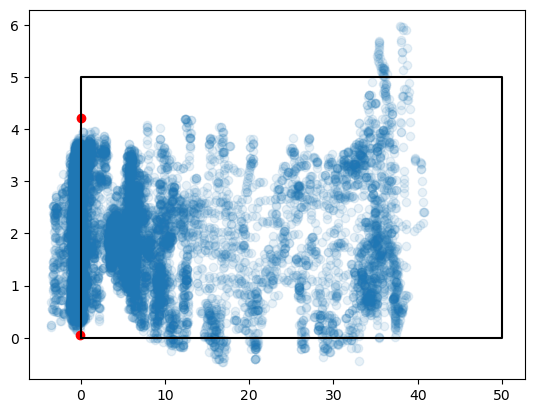



Could not analyze {'recording_date': '220809', 'animal': '195_F8-16', 'paradigm': 'OTT', 'cam': 'Top'} due to normalization issue!


Report for 206_F2-87_220810_OTT: 

Nothing to report!


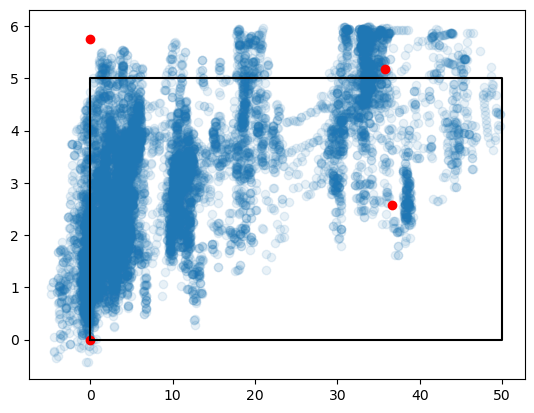



Could not analyze {'recording_date': '220811', 'animal': '195_F8-20', 'paradigm': 'OTR', 'cam': 'Top'} due to normalization issue!


Could not analyze {'recording_date': '220809', 'animal': '206_F2-81', 'paradigm': 'OTR', 'cam': 'Top'} due to normalization issue!


Report for 206_F2-87_220809_OTR: 

Nothing to report!


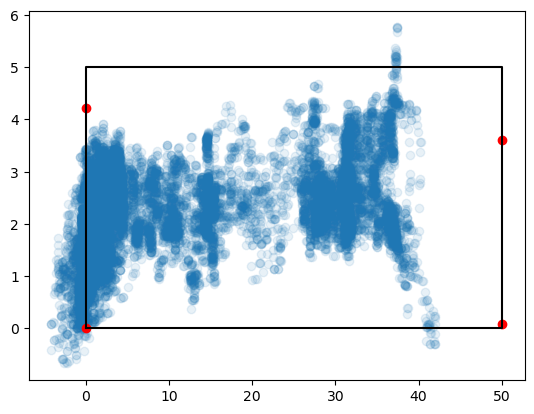



Report for 209_F1-92_220811_OTR: 

Nothing to report!


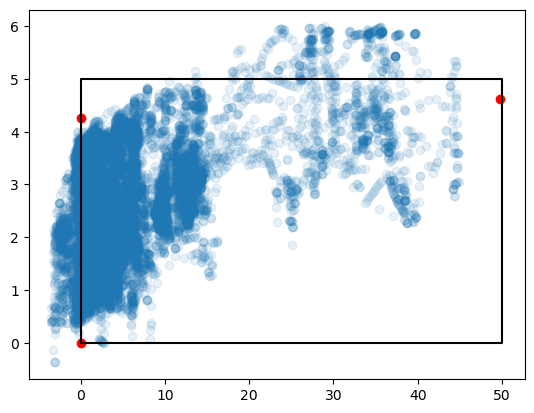



Could not analyze {'recording_date': '220810', 'animal': '195_F8-20', 'paradigm': 'OTE', 'cam': 'Top'} due to normalization issue!


Could not analyze {'recording_date': '220811', 'animal': '206_F2-80', 'paradigm': 'OTT', 'cam': 'Top'} due to normalization issue!


Could not analyze {'recording_date': '220809', 'animal': '195_F8-20', 'paradigm': 'OTT', 'cam': 'Top'} due to normalization issue!


Report for 206_F2-86_220809_OTR: 

Nothing to report!


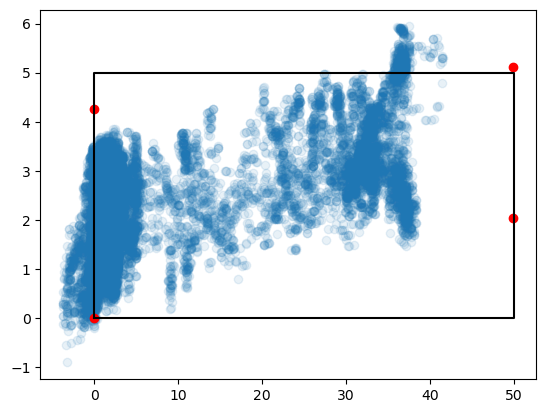



Report for 209_F1-91_220810_OTR: 

Snout tracking: 0.8583495415393165

TailBase tracking: 0.8979160878021673


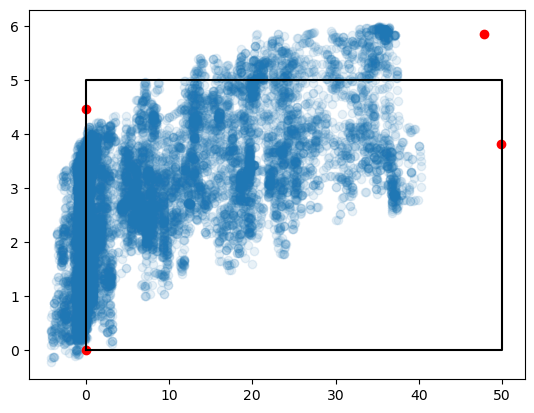



Report for 195_F8-16_220811_OTE: 

Snout tracking: 0.8634797109505281


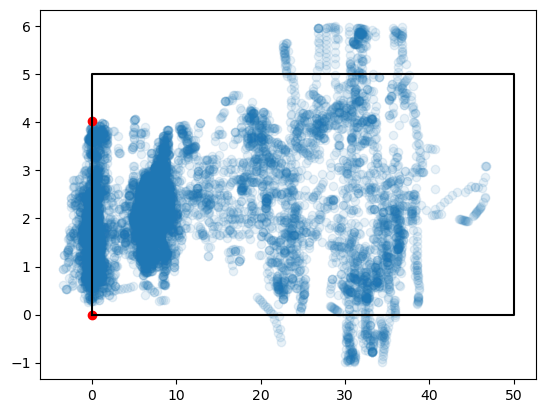



Report for 209_F1-91_220809_OTE: 

Snout tracking: 0.8523005112247166

TailBase tracking: 0.8599133140697933


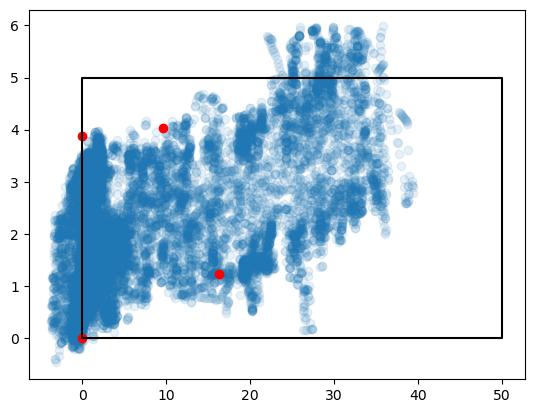



Report for 206_F2-86_220811_OTE: 

Missing events: ['freezing_of_gait']


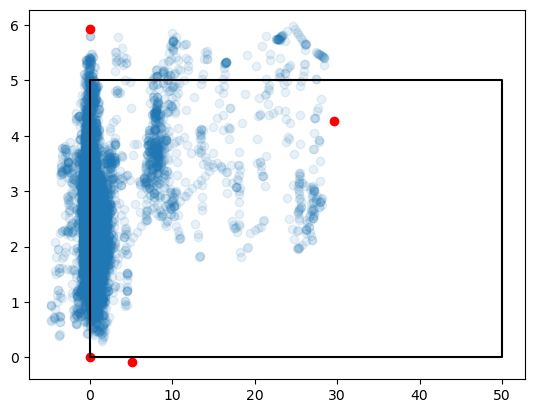



Could not analyze {'recording_date': '220809', 'animal': '206_F2-80', 'paradigm': 'OTR', 'cam': 'Top'} due to normalization issue!


Report for 206_F2-86_220810_OTT: 

Nothing to report!


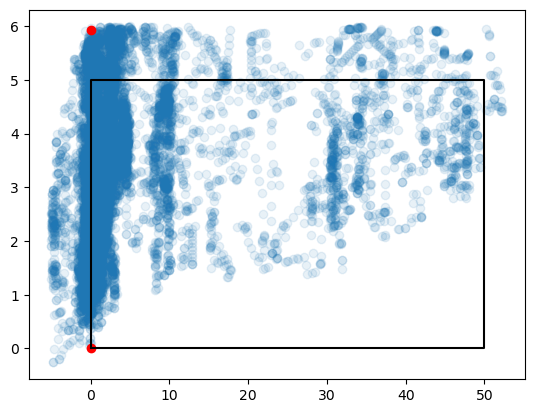



Report for 206_F1-89_220810_OTT: 

Snout tracking: 0.7850872319146572


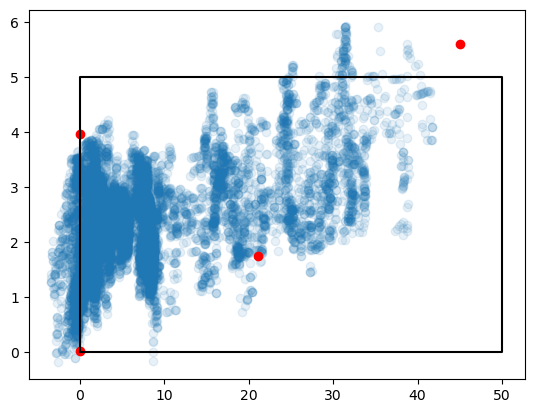



Report for 195_F8-16_220810_OTR: 

Nothing to report!


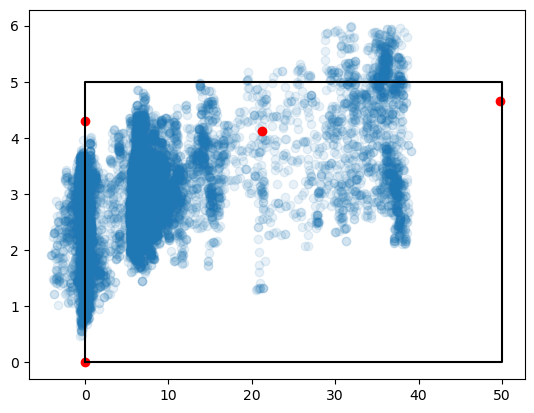



Report for 206_F1-89_220811_OTR: 

Nothing to report!


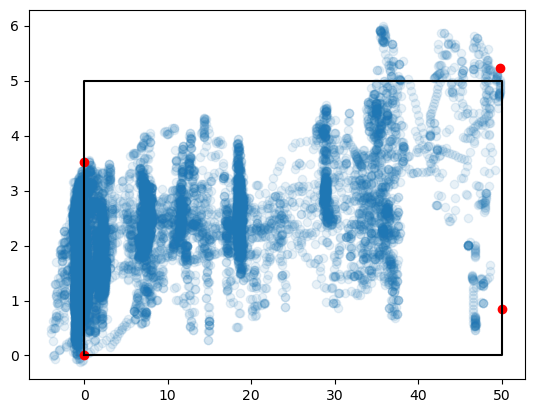



Report for 209_F1-92_220809_OTE: 

Snout tracking: 0.8160146699266504

TailBase tracking: 0.8650811291398088


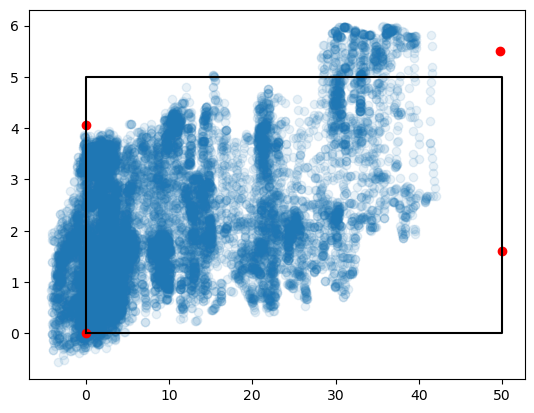



Report for 209_F1-92_220810_OTT: 

Snout tracking: 0.8860365616491638


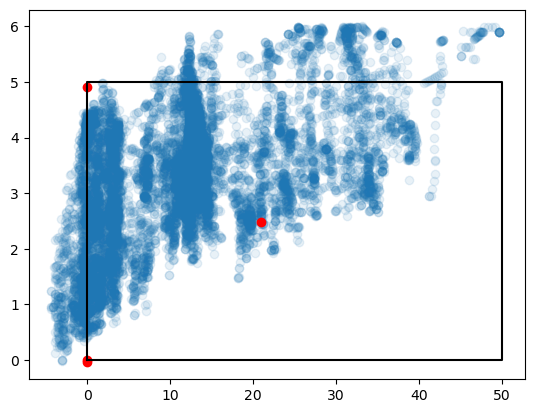



Report for 206_F2-81_220811_OTT: 

Nothing to report!


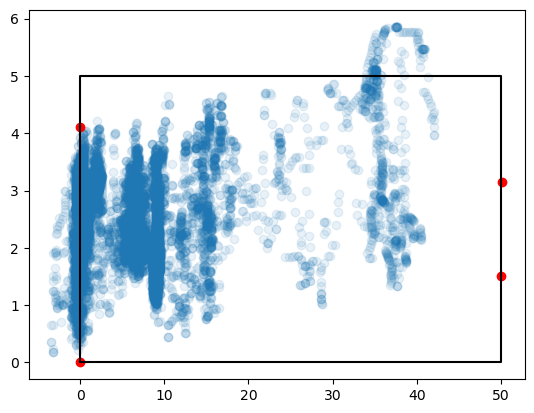



Could not analyze {'recording_date': '220809', 'animal': '206_F1-89', 'paradigm': 'OTE', 'cam': 'Top'} due to normalization issue!


Could not analyze {'recording_date': '220810', 'animal': '206_F2-81', 'paradigm': 'OTE', 'cam': 'Top'} due to normalization issue!


In [3]:
objects = [] 
for file in files:
    try:
        obj = RecordingTop(filepath=Path(file), recorded_framerate=30)
        obj.run(intrinsic_camera_calibration_filepath="/Users/kobel/Downloads/Checkerboard_Calibration/Top_checkerboard_intrinsic_calibration_results.p")
        obj.get_freezing_bouts()
        obj.run_gait_analysis()
        obj.export_as_session(save = False)
        objects.append(obj)
        
        #plotting
        fig = plt.figure()
        x = [point[0] for point in obj.log['plotting_marker']]
        y = [point[1] for point in obj.log['plotting_marker']]
        plt.scatter(obj.bodyparts['Snout'].df['x'], obj.bodyparts['Snout'].df['y'], alpha = 0.1)
        plt.scatter(x, y, c = 'red')
        plt.plot([0, 0, 50, 50, 0], [0, 5, 5, 0, 0], c = 'black')
        plt.show()
    except OverflowError:
        print(f'\n\nCould not analyze {obj.metadata} due to normalization issue!')

In [4]:
objects[0].log

{'crashed': False,
 'snout_on_maze': 0.9678154530294608,
 'tailbase_on_maze': 0.9946637020566982,
 'likelihood_threshold': 0.9974999999999992,
 'rotation_angle': 1.5822708170507156,
 'conversion_factor': 0.36972082329106504,
 'plotting_marker': [array([0.00884233, 0.00663162]),
  array([nan, nan]),
  array([nan, nan]),
  array([43.35603787,  2.97709762])],
 'number_frames': 17990,
 'snout_tracking': 0.9693162868260145,
 'tailbase_tracking': 0.9806003335186214,
 'missing_event_types': ['freezing', 'freezing_of_gait']}

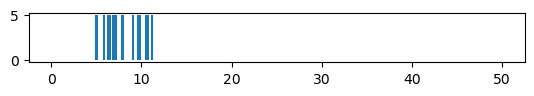

In [5]:
parameter = 'immobility'

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for obj in objects:
    try:
        plt.vlines(obj.session_df.loc[parameter, 'mean_x_position'], 0, 5)
    except:
        continue
plt.show()

35


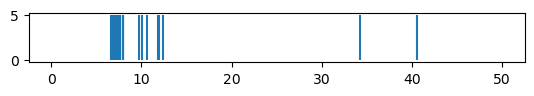

In [6]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for bout in objects[0].immobility_bouts.events:
    plt.vlines(bout.dict['x_position'], 0, 5, alpha=1)
print(len(objects[0].immobility_bouts.events))
plt.show()

In [7]:
obj = objects[0]
print('Immobility:', obj.immobility_bouts.df)
print('Freezing:', obj.freezing_bouts.df)
print('GaitDisruption:', obj.gait_disruption_bouts.df)
print('FreezinOfGait:', obj.freezing_of_gait_events.df)
print('Gait:', obj.gait_events.df)


Immobility:     duration  x_position  id  facing_towards_open_end
0   0.266667   12.437605   0                     True
1   0.300000   11.998455   2                     True
2   0.300000    7.997018   2                    False
3   0.300000    7.316712   3                    False
4   0.233333    7.529574   4                    False
5   0.333333    7.637265   3                    False
6   0.233333    7.343877   6                    False
7   0.266667    7.462196   7                    False
8   0.300000    7.065127   4                    False
9   0.333333    7.003615   5                    False
10  0.233333    7.140031  10                    False
11  0.300000    7.201494  11                    False
12  0.233333    7.179827  12                    False
13  0.300000    7.211768  13                    False
14  0.300000    7.171010   6                    False
15  0.233333    7.051555  15                    False
16  0.233333    7.139055  16                    False
17  0.233333    